
# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 **About the Dataset** 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.<br><br>
### **Dataset Description**
The Dataset contains 110527 **observations**, and 14 **Variables**.More Variables were created to aid the analysis.

<ol>
    <li><h4>patient_id</h4>This is a unique Id assigned to each patient</li>
    <li><h4>appointment_id</h4>This is also a unique for appointments made by patients </li>
    <li><h4>gender</h4> Takes two Values M and F , denoting Male and Female gender respectively</li>
<li><h4>scheduled_date</h4>The date a patient comes to make an appointment ,also unique.</li>
    <li><h4>appointment_date</h4>The date an appointment is meant to occur ,also unique </li>
    <li><h4>age</h4> The respective ages of each patients,they are of numeric value  </li>
<li><h4>neighbourhood</h4> indicates the location of the hospital.</li>
<li><h4>scholarship</h4>indicates whether or not the patient is enrolled in Brasilian welfare program</li>
<li><h4>hypertension</h4> 0  if you a patient is  not hypertensive ,1 if they are </li>
<li><h4>diabetes</h4>0 if a patient is not diabetic and 1 if they are </li>
<li><h4>alcoholism</h4>0 if patients arent alcoholic and 1 if they are </li>
<li><h4>handicap</h4> Values betwwen 0 and 4 , zero if a patient isnt handicapped ,other numbers shows the specificity of the handicapness</li>
<li><h4>sms</h4>  zero if a patient doesnt receive an sms reminder for their appointment date and one if they did
</li>
<li><h4>no_show</h4> No if the patient showed up to their appointment, and Yes if they did not show up
    </li>
<li><h4>scheduled_day</h4> newly created variable from the scheduling date variable ,indicates day of the week a patient comes for scheduling 
 </li>
<li><h4>appointment_day</h4>  newly created variable from the appointment  variable indicates  day of the week a patient comes for appointment
 </li>
<li> <h4>days_apart</h4> The day(s) difference between the scheduling date and appointment date </li>
 <li><h4>age_groups</h4> newly created variable from the age columns ,ages were split into 7 categories</li>
</ol>


### Business Problem
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
## importing the required libraries 
import pandas as pd 
import numpy as np 
import seaborn  as sns 
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
## reading the Dataset into the jupyter environment with pandas
df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

**Dimension of Dataset:** <br>
The Dataset comprises of **110527** observations(rows) and **14** Variables(columns)

<a id='wrangling'></a>
## Data Wrangling


**Checking the  Data types of the Dataset Variables**

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**The days related variable{scheduled_day ,appointment_day} are formatted as object as opposed to being formatted as Datetime**

**Checking for Nulls and possible Duplicates**

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.duplicated().sum()

0

**No Nulls or Duplicates  found**

**Column names**

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

The Columns need to be of the same format,while some needs respelling   

**Calling the nunique method on the Variables**

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df[['AppointmentDay','ScheduledDay']].head(4)

,AppointmentDay,ScheduledDay
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z


AppointmentDay is a  Date value(i.e,No time) ,while the ScheduledDay Takes a Datetime Value ,Hence why it has more unique values compared to AppointmentDay 

**Eight  of the Fourteen(8/14) Variables are  Categorical,hence  will   be formatted  as such**

<a id='cleaning'></a>

### Data Cleaning
**In this phase ,issues raised in the Data Wrangling Phase will be Treated**

**Formatting the Variable Names**

In [10]:
df.rename(columns={'PatientId':'patient_id','Hipertension':'Hypertension','No-show':'No_show','AppointmentID':'Appointment_id','AppointmentDay':'appointment_date','ScheduledDay':'scheduled_date','SMS_received':'sms','Handcap':'handicap'},inplace=True)
df= df.rename(columns=str.lower)
df.head(0)

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show


**Data Type Assignment**

In [11]:
df['appointment_date']= pd.to_datetime(df['appointment_date']).dt.normalize()
df['scheduled_date']= pd.to_datetime(df['scheduled_date']).dt.normalize()

In [12]:
df[['scheduled_date','appointment_date']].dtypes

scheduled_date      datetime64[ns]
appointment_date    datetime64[ns]
dtype: object

**Creating a Day of the Week Column and Day Difference column between Scheduled Date and Appointment  Date**

In [13]:
df['scheduled_day']=df['scheduled_date'].dt.day_name()
df['appointment_day']=df['appointment_date'].dt.day_name()
df['days_apart'] = (df['appointment_date'] - df['scheduled_date']).dt.days
df.head(10)

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Wednesday,Friday,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday,Friday,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Wednesday,Friday,2


In [14]:
df['patient_id'].nunique()

62299

<h4>This Implies some patients have more than one scheduled Day, maybe as a result of them missing their appointment date which they tend to come up for rescheduling  or perhabs more than one visitations is required so the reason for some patients having more than Scheduling Day </h4>

In [15]:
df[['appointment_id', 'gender']].nunique()


appointment_id    110527
gender                 2
dtype: int64

As expected the **appointment_id** is unique  and the **gender variable** comtain two unique  values genders(male and female).

calling the describe method on the discrete variables **(age,days_apart)**

In [16]:
df[['age','days_apart']].describe()

,age,days_apart
count,110527.000000,110527.000000
mean,37.088874,10.183702
std,23.110205,15.254996
min,-1.000000,-6.000000
25%,18.000000,0.000000
50%,37.000000,4.000000
75%,55.000000,15.000000
max,115.000000,179.000000


From Calling The  Describe method , few things need to be addressed ,such as both variables having negative minimum Values .

In [17]:
df_1=df.query('days_apart<0')
print(df_1.shape)
df_1.head()

(5, 17)


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Tuesday,Monday,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Wednesday,Tuesday,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Thursday,Wednesday,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Wednesday,Thursday,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Wednesday,Tuesday,-1


For the Negative days_apart values ,this is as a result of the appointment_date been recorded as a precedent to the scheduled_date ,we will be dropping these 5 observations . 

In [18]:
## removing the negative days_apart observation
df=df.query('days_apart>=0')
df[['age','days_apart']].describe()

,age,days_apart
count,110522.000000,110522.000000
mean,37.089041,10.184253
std,23.110064,15.255115
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,4.000000
75%,55.000000,15.000000
max,115.000000,179.000000


**Addressing the negative age values**

In [19]:
##removing the negative age observation
df_age=df.query('age<=0')
print('Number of rows with age value less than or equal to zero-',df_age.shape[0])
df_age.head()

Number of rows with age value less than or equal to zero- 3540


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart
59,7.184428e+13,5638545,F,2016-04-29,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No,Friday,Friday,0
63,2.366233e+14,5628286,M,2016-04-27,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No,Wednesday,Friday,2
64,1.885174e+14,5616082,M,2016-04-25,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No,Monday,Friday,4
65,2.718818e+14,5628321,M,2016-04-27,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No,Wednesday,Friday,2
67,8.647128e+13,5639264,F,2016-04-29,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No,Friday,Friday,0


In [20]:
df_age['age'].value_counts().to_frame(name='age_count')

,age_count
0,3539
-1,1


The Negative age Observation will be dropped , and the zero age values will be kept ,as a result of them to most likely to  be babies ,we put this hypothesis to test by checking hypertension ,diabetes and alcoholism variables

In [21]:
df_variables= df_age[['age','hypertension' ,'diabetes' , 'alcoholism']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


age
 0    3539
-1       1
Name: age, dtype: int64

hypertension
0    3540
Name: hypertension, dtype: int64

diabetes
0    3540
Name: diabetes, dtype: int64

alcoholism
0    3540
Name: alcoholism, dtype: int64



Turns out the hypothesis is correct as a result of adult related columns giving a zero count value,proceeding to drop the negative observation

In [22]:
## removing the negative age observation.
df=df.query('age>=0')
df[['age','days_apart']].describe()

,age,days_apart
count,110521.000000,110521.000000
mean,37.089386,10.184345
std,23.109885,15.255153
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,4.000000
75%,55.000000,15.000000
max,115.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

<h5>In this Section, Descriptive Statistics will be done  alongside with Visualizations to help determine the Possible <em>Variables</em> responsible for Patients showing up on their appointment Days or not  . In this Light the Dataset will be separated into two based on the <bold>no_show</bold> Variable </h5>

In [23]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_date',
       'appointment_date', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms', 'no_show',
       'scheduled_day', 'appointment_day', 'days_apart'],
      dtype='object')

The **age** Variable will be binned into 7 Groups .

In [24]:
df['age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [25]:
# Bin edges that will be used to "cut" the data into groups
bin_edges =[ 0,2,5,13,19,40,60,115]
# Labels for the four age level groups
bin_names = ['Infant','Toddler','Child','Teens','Adult' ,'Senior Adult' ,'Elderly' ] 


In [26]:
# Creates age_group variable
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)
# Checks for successful creation of this column
df.head()

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart,age_groups
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0,Elderly
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0,Senior Adult
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0,Elderly
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0,Child
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0,Senior Adult


In [27]:
df_show=df.query('no_show=="No"')
df_noshow=df.query('no_show=="Yes"')

#Taking the dimension of df_show 
print('Percentage  of the  observations that showed up for their appointments-',(df_show.shape[0]/df.shape[0])*100,'%')
#Taking the dimension of 
print('Percentage of observations that defaulted  their appointments-',(df_noshow.shape[0]/df.shape[0])*100,'%')


Percentage  of the  observations that showed up for their appointments- 79.81017182254956 %
Percentage of observations that defaulted  their appointments- 20.18982817745044 %


so approximately *80%* of The Dataset showed for their appointments while *20%* defaulted  <br>
Checking for the variables that makes up each Dataset 

Going Through Each Age category To Determine what might prompt appointments to  be defaulted or not 

In [28]:
# infant group 
df_infant=df.query('age_groups=="Infant"')
df_infant.head()

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart,age_groups
55,4.179932e+13,5638018,M,2016-04-29,2016-04-29,2,NOVA PALESTINA,0,0,0,0,0,0,No,Friday,Friday,0,Infant
61,5.594636e+11,5626971,F,2016-04-27,2016-04-29,2,NOVA PALESTINA,0,0,0,0,0,0,Yes,Wednesday,Friday,2,Infant
66,9.784893e+14,5638604,M,2016-04-29,2016-04-29,1,CONQUISTA,0,0,0,0,0,0,No,Friday,Friday,0,Infant
87,4.143142e+12,5595356,M,2016-04-18,2016-04-29,2,ILHA DE SANTA MARIA,0,0,0,0,0,0,No,Monday,Friday,11,Infant
88,4.448346e+12,5595358,M,2016-04-18,2016-04-29,1,JUCUTUQUARA,0,0,0,0,0,0,No,Monday,Friday,11,Infant


In [29]:
## Creating a reusable function as the value_count functions will be used a lot
def genderviz(data,col='gender',category=''):
    colors=['darkblue','darkgrey']
    value = data[col].value_counts()
    print(value)
    value.plot(kind='barh',title="Gender Proportions Among {} Age Category".format(category),color=colors)
    plt.ylabel('Gender')
    plt.xlabel('Frequency')

In [30]:
## Creating a reusable function for visualizing the no_show variable
def showviz(data,col='no_show',category=''):
    colors=['darkgreen','darkred']
    value = data[col].value_counts()
    print(value)
    value.plot(kind='bar',title="Show Up Appointments Amongst The {} Category".format(category),color=colors)
    plt.xlabel('No show')
    plt.ylabel('Frequency')


In [31]:
## Creating a reusable function for visualizing the  gender proportions of the no_show variable

def gendershow(data,col='gender',category=''):
    colors=['black','darkgrey']
    value = data[col].value_counts()
    print(value)
    value.plot(kind='bar',title="Gender Proportions Amongst  {} Who Showed Up".format(category),color=colors)
    plt.xlabel('Gender')
    plt.ylabel('Frequency')





M    2046
F    1845
Name: gender, dtype: int64


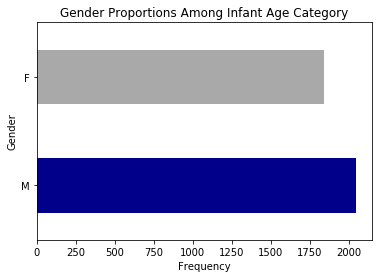

In [32]:
genderviz(df_infant,category='Infant')

No     3224
Yes     667
Name: no_show, dtype: int64


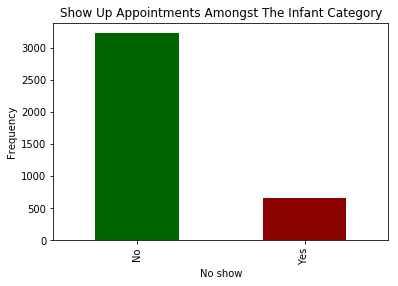

In [33]:
showviz(df_infant,category='Infant')

The Barchart implies Infants  appointment are mostly likely to get a show up,lets explore this further 

In [34]:
df_variables=df_infant[['gender','scholarship','appointment_day','sms']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
M    2046
F    1845
Name: gender, dtype: int64

scholarship
0    3690
1     201
Name: scholarship, dtype: int64

appointment_day
Monday       963
Tuesday      848
Wednesday    836
Friday       673
Thursday     571
Name: appointment_day, dtype: int64

sms
0    2932
1     959
Name: sms, dtype: int64



In [35]:
#infant appointment that show up
df_infant_show= df_infant.query('no_show=="No"')
df_infant.shape[0],df_infant_show.shape[0]

(3891, 3224)

Monday       963
Tuesday      848
Wednesday    836
Friday       673
Thursday     571
Name: appointment_day, dtype: int64


Text(0,0.5,'frequency')

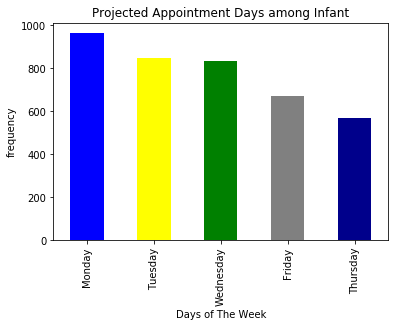

In [36]:
print(df_infant['appointment_day'].value_counts())
colors=['blue','yellow','green','grey','darkblue']
df_infant['appointment_day'].value_counts().plot(kind='bar',title="Projected Appointment Days among Infant",color=colors);
plt.xlabel('Days of The Week')
plt.ylabel('frequency')

In [37]:
df_variables=df_infant_show[['gender','scholarship','appointment_day','sms']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
M    1692
F    1532
Name: gender, dtype: int64

scholarship
0    3050
1     174
Name: scholarship, dtype: int64

appointment_day
Monday       794
Tuesday      710
Wednesday    694
Friday       543
Thursday     483
Name: appointment_day, dtype: int64

sms
0    2584
1     640
Name: sms, dtype: int64



Monday       794
Tuesday      710
Wednesday    694
Friday       543
Thursday     483
Name: appointment_day, dtype: int64


Text(0,0.5,'frequency')

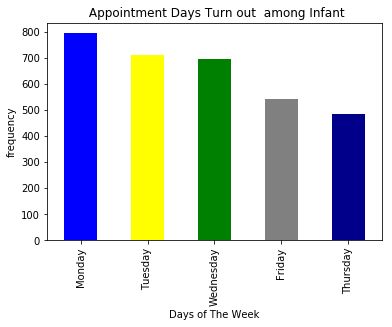

In [38]:
colors=['blue','yellow','green','grey','darkblue']
print(df_infant_show['appointment_day'].value_counts())
df_infant_show['appointment_day'].value_counts().plot(kind='bar',title=" Appointment Days Turn out  among Infant",color=colors);
plt.xlabel('Days of The Week')
plt.ylabel('frequency')

In [39]:
df_infant_show['days_apart'].describe()

count    3224.000000
mean        6.315136
std        13.312188
min         0.000000
25%         0.000000
50%         0.000000
75%         6.250000
max       125.000000
Name: days_apart, dtype: float64

The Sd of the infant category is at least twice of the mean , which shows how the mean is quite far away from the rest of the dataset .

In [40]:
## function to visualize Days apart Distribution with turn out  
def showdays(data,col='days_apart',category=''):
    value=data[col]
    value.plot(kind='hist',title='Days_apart Distribution Among {} who showed up'.format(category))
    plt.xlabel('Days Apart')



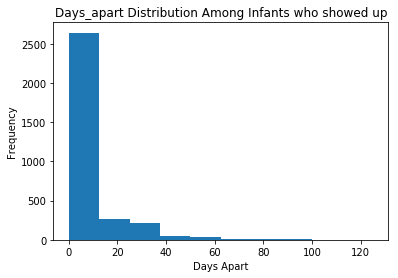

In [41]:
showdays(df_infant_show,category='Infants')

Most turn outs in the infant category occur with a days_apart value,less than 6,This is a factor to be considered in deciding the prediction of no_show among infants apointment . 

In [42]:
#infant appointment with no show up
df_infant_noshow= df_infant.query('no_show=="Yes"')
df_infant.shape[0],df_infant_noshow.shape[0]

(3891, 667)

In [43]:
df_variables=df_infant_noshow[['gender','scholarship','appointment_day','sms']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
M    354
F    313
Name: gender, dtype: int64

scholarship
0    640
1     27
Name: scholarship, dtype: int64

appointment_day
Monday       169
Wednesday    142
Tuesday      138
Friday       130
Thursday      88
Name: appointment_day, dtype: int64

sms
0    348
1    319
Name: sms, dtype: int64



In [44]:
df_infant_noshow['days_apart'].describe()

count    667.000000
mean      18.583208
std       16.169343
min        0.000000
25%        6.000000
50%       14.000000
75%       29.000000
max       91.000000
Name: days_apart, dtype: float64

The mean and sd of the appointment with no turn out have an absolute diiference o 2, which implies that for the infant categories ,appointment with  a days_part value of 18 are most likely not to get aa show up

In [45]:
# function to visualize Days apart Distribution with turn out  
def noshowdays(data,col='days_apart',category=''):
    value=data[col]
    value.plot(kind='hist',title='Days_apart Distribution Among {} with No Turn Out'.format(category))
    plt.xlabel('Days Apart')



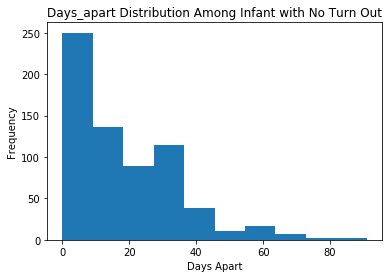

In [46]:
## visualizing days apart distribution with no turn out 
noshowdays(df_infant_noshow,category='Infant')

In the Infant Categories , There's no appointment on saturday , so this  a factor to be considered in predicting no show appoinntment among Infants and  variables like scholarship,sms  didnt a substantible insight.

In [47]:
# Toddler group 
df_toddler=df.query('age_groups=="Toddler"')
print('Number of Observations that falls within Toddler Category-', df_toddler.shape[0])
df_toddler.head()

Number of Observations that falls within Toddler Category- 4301


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart,age_groups
21,1.215484e+13,5628338,F,2016-04-27,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes,Wednesday,Friday,2,Toddler
27,1.215484e+13,5628345,F,2016-04-27,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,No,Wednesday,Friday,2,Toddler
62,3.647762e+13,5614045,F,2016-04-25,2016-04-29,3,CONQUISTA,1,0,0,0,0,1,No,Monday,Friday,4,Toddler
96,7.937625e+13,5623692,M,2016-04-26,2016-04-29,3,BONFIM,0,0,0,0,0,1,No,Tuesday,Friday,3,Toddler
130,1.523993e+14,5639855,F,2016-04-29,2016-04-29,5,SANTA HELENA,1,0,0,0,0,0,No,Friday,Friday,0,Toddler


Text(0,0.5,'frequency')

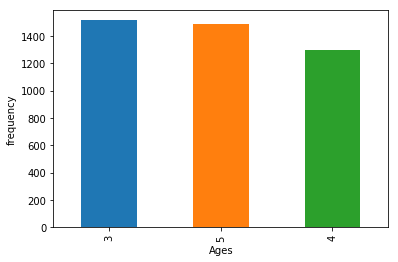

In [48]:
df_toddler['age'].value_counts().plot(kind='bar');
plt.xlabel('Ages')
plt.ylabel('frequency')

M    2263
F    2038
Name: gender, dtype: int64


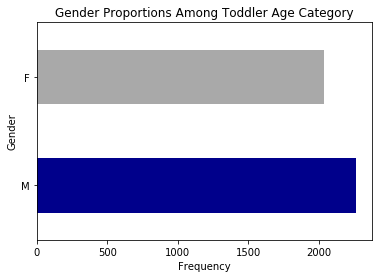

In [49]:
## calling the genderviz function on the toddler category
genderviz(df_toddler,col='gender',category='Toddler')

Just like the Infant Category  the gender proportions evens out 

No     3422
Yes     879
Name: no_show, dtype: int64


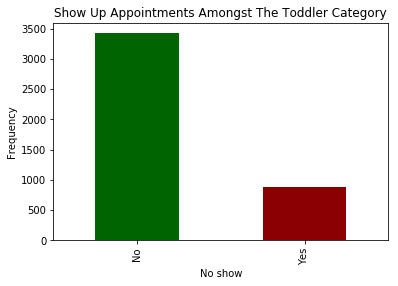

In [50]:
# visualizing the no show variable in The Toddler Age group
showviz(df_toddler,category='Toddler')

The Toddler Category also have a high turn out rate .

In [51]:
df_variables=df_toddler[['gender','scholarship','appointment_day','sms','no_show','diabetes']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
M    2263
F    2038
Name: gender, dtype: int64

scholarship
0    3773
1     528
Name: scholarship, dtype: int64

appointment_day
Tuesday      1018
Wednesday     942
Monday        919
Friday        740
Thursday      682
Name: appointment_day, dtype: int64

sms
0    3022
1    1279
Name: sms, dtype: int64

no_show
No     3422
Yes     879
Name: no_show, dtype: int64

diabetes
0    4300
1       1
Name: diabetes, dtype: int64



In [52]:
df_toddler_show=df_toddler.query('no_show=="No"')

In [53]:
df_variables=df_toddler_show[['gender','scholarship','appointment_day','sms','diabetes']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
M    1811
F    1611
Name: gender, dtype: int64

scholarship
0    3004
1     418
Name: scholarship, dtype: int64

appointment_day
Tuesday      810
Wednesday    755
Monday       726
Friday       577
Thursday     554
Name: appointment_day, dtype: int64

sms
0    2531
1     891
Name: sms, dtype: int64

diabetes
0    3421
1       1
Name: diabetes, dtype: int64



In [54]:
df_toddler_show['days_apart'].describe()

count    3422.000000
mean        7.658971
std        12.363408
min         0.000000
25%         0.000000
50%         0.000000
75%        11.000000
max       104.000000
Name: days_apart, dtype: float64

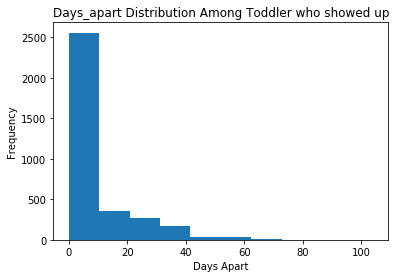

In [55]:
showdays(df_toddler_show,category='Toddler')

In [56]:
df_toddler_noshow=df_toddler.query('no_show=="Yes"')
df_variables=df_toddler_noshow[['gender','scholarship','appointment_day','sms','diabetes']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
M    452
F    427
Name: gender, dtype: int64

scholarship
0    769
1    110
Name: scholarship, dtype: int64

appointment_day
Tuesday      208
Monday       193
Wednesday    187
Friday       163
Thursday     128
Name: appointment_day, dtype: int64

sms
0    491
1    388
Name: sms, dtype: int64

diabetes
0    879
Name: diabetes, dtype: int64



In [57]:
df_toddler_noshow['days_apart'].describe()

count    879.000000
mean      17.705347
std       15.844586
min        0.000000
25%        6.000000
50%       14.000000
75%       27.000000
max      146.000000
Name: days_apart, dtype: float64

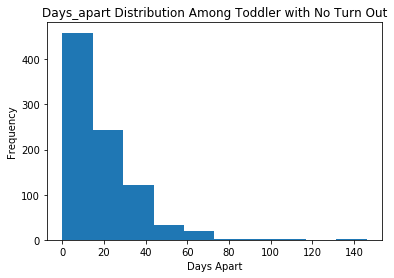

In [58]:
#df_toddler_noshow['days_apart'].plot(kind='hist',bins=30);
noshowdays(df_toddler_noshow,category='Toddler')

In [59]:
# Child group 
df_child=df.query('age_groups=="Child"')
print('Number of Observations that falls within Child Category-', df_child.shape[0])
df_child.head()

Number of Observations that falls within Child Category- 10407


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart,age_groups
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0,Child
22,8.632298e+14,5616091,M,2016-04-25,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes,Monday,Friday,4,Child
31,3.112849e+11,5628907,M,2016-04-27,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,Wednesday,Friday,2,Child
53,4.438587e+14,5637909,M,2016-04-29,2016-04-29,6,CONQUISTA,0,0,0,0,0,0,No,Friday,Friday,0,Child
54,3.371889e+12,5638164,F,2016-04-29,2016-04-29,6,NOVA PALESTINA,0,0,0,0,0,0,No,Friday,Friday,0,Child


M    2046
F    1845
Name: gender, dtype: int64


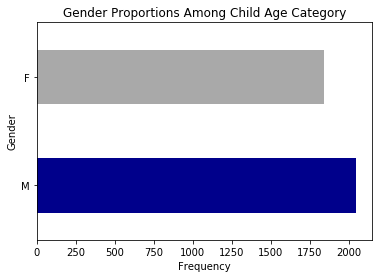

In [60]:
##visualizing the gender in the child category
genderviz(df_infant,col='gender',category='Child')

The child category constitutes 10% of our entire dataset.

No     7983
Yes    2424
Name: no_show, dtype: int64


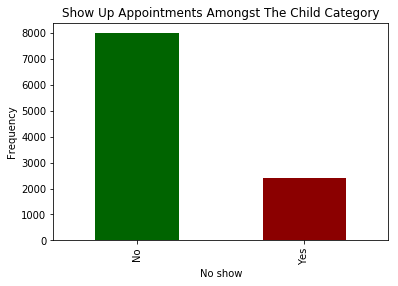

In [61]:
showviz(df_child,category='Child')

In [62]:
## Dataset of Child Category with Turn out
df_child_show=df_child.query('no_show=="No"')
df_variables=df_child_show[['gender','scholarship','appointment_day','sms','diabetes']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
M    4161
F    3822
Name: gender, dtype: int64

scholarship
0    6871
1    1112
Name: scholarship, dtype: int64

appointment_day
Wednesday    1962
Tuesday      1797
Monday       1655
Friday       1354
Thursday     1215
Name: appointment_day, dtype: int64

sms
0    5576
1    2407
Name: sms, dtype: int64

diabetes
0    7971
1      12
Name: diabetes, dtype: int64



Wednesday    2621
Tuesday      2291
Monday       2126
Friday       1779
Thursday     1590
Name: appointment_day, dtype: int64


Text(0,0.5,'frequency')

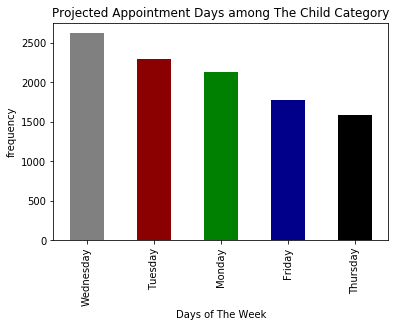

In [63]:
colors=['grey','darkred','green','darkblue','black']
print(df_child['appointment_day'].value_counts())
df_child['appointment_day'].value_counts().plot(kind='bar',title="Projected Appointment Days among The Child Category",color=colors);
plt.xlabel('Days of The Week')
plt.ylabel('frequency')

Text(0,0.5,'frequency')

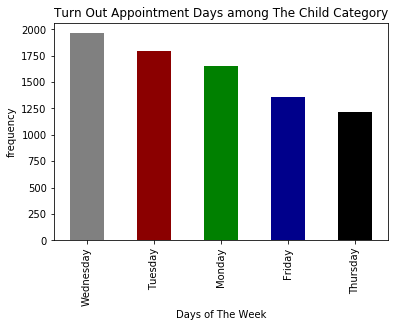

In [64]:
colors=['grey','darkred','green','darkblue','black']
df_child_show['appointment_day'].value_counts().plot(kind='bar',title="Turn Out Appointment Days among The Child Category",color=colors);
plt.xlabel('Days of The Week')
plt.ylabel('frequency')

The projected appointment days tallies with the appointment day.

M    4161
F    3822
Name: gender, dtype: int64


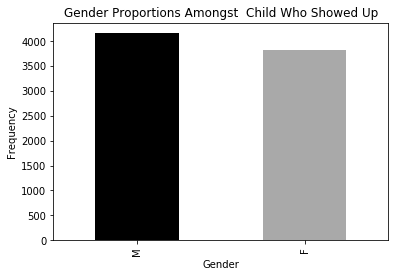

In [65]:
# creating a chart to see if gender is a variable to consider in this category
gendershow(df_child_show,category='Child')

so gender is not a variable to be considered  for predicting no_show in the Child Category 

In [66]:
# calling describe method on the days_apart variable
df_child_show['days_apart'].describe()

count    7983.000000
mean        8.357134
std        12.066564
min         0.000000
25%         0.000000
50%         2.000000
75%        14.000000
max       104.000000
Name: days_apart, dtype: float64

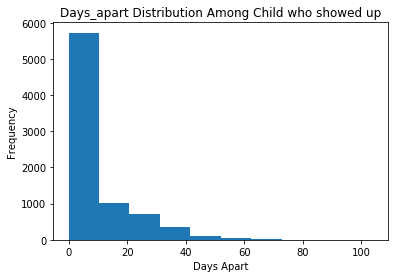

In [67]:
showdays(df_child_show,category='Child')

Most Turn out appointments occur between zero and ten days_apart value ,This is a factor to be considered in predicting no_show for the Child Category.

In [68]:
## Dataset of Child Category with No Turn out
df_child_noshow=df_child.query('no_show=="Yes"')
df_variables=df_child_noshow[['gender','scholarship','appointment_day','sms','diabetes']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
M    1266
F    1158
Name: gender, dtype: int64

scholarship
0    2055
1     369
Name: scholarship, dtype: int64

appointment_day
Wednesday    659
Tuesday      494
Monday       471
Friday       425
Thursday     375
Name: appointment_day, dtype: int64

sms
0    1440
1     984
Name: sms, dtype: int64

diabetes
0    2420
1       4
Name: diabetes, dtype: int64



The gender also evened out in the dataset with no turn out

In [69]:
df_child_noshow['days_apart'].describe()

count    2424.000000
mean       15.189356
std        15.221464
min         0.000000
25%         3.000000
50%        10.000000
75%        24.000000
max       104.000000
Name: days_apart, dtype: float64

The mean and the standard deviation are approximately the same with a value of 15, so this implies,days_apart value from 15 and upwards are very less likely to show up 

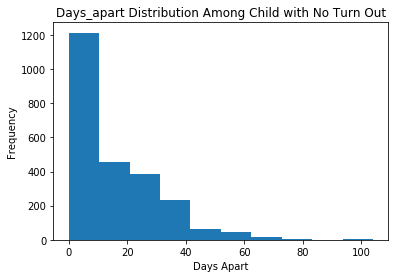

In [70]:
noshowdays(df_child_noshow,category='Child')

In [71]:
# Teens group 
df_teens=df.query('age_groups=="Teens"')
print('Number of Observations that falls within Teens Category-', df_teens.shape[0])
df_teens.head()

Number of Observations that falls within Teens Category- 8271


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart,age_groups
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Wednesday,Friday,2,Teens
15,9.994839e+10,5620206,F,2016-04-26,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No,Tuesday,Friday,3,Teens
35,7.816264e+13,5637968,M,2016-04-29,2016-04-29,18,SÃO CRISTÓVÃO,0,0,0,0,0,0,No,Friday,Friday,0,Teens
50,1.827172e+14,5534661,F,2016-03-31,2016-04-29,19,GRANDE VITÓRIA,0,0,0,0,0,1,Yes,Thursday,Friday,29,Teens
114,3.585621e+13,5591384,F,2016-04-15,2016-04-29,15,BELA VISTA,0,0,0,0,0,1,No,Friday,Friday,14,Teens


F    5492
M    2779
Name: gender, dtype: int64


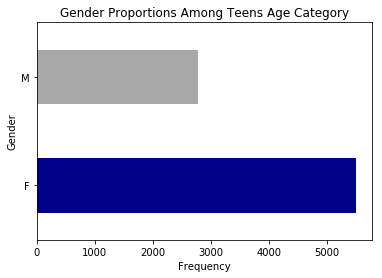

In [72]:
# gender visualization of the Teens Category
genderviz(df_teens,category='Teens')

The Female Gender Size is twice as much of their Male counterpart ,This is the first Age category this is happening.

No     6141
Yes    2130
Name: no_show, dtype: int64


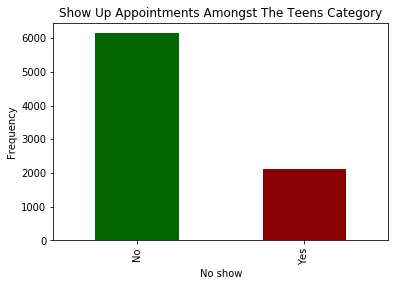

In [73]:
## visualizing the no show variable in the Teens Age group
showviz(df_teens,category='Teens')

More Turn out in this category also 


In [74]:
## Dataset of Teens Category with Turn out
df_teens_show=df_teens.query('no_show=="No"')

In [75]:
df_variables=df_teens_show[['gender','scholarship','appointment_day','sms','diabetes','handicap']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
F    4120
M    2021
Name: gender, dtype: int64

scholarship
0    5323
1     818
Name: scholarship, dtype: int64

appointment_day
Wednesday    1446
Tuesday      1442
Monday       1164
Friday       1134
Thursday      955
Name: appointment_day, dtype: int64

sms
0    4565
1    1576
Name: sms, dtype: int64

diabetes
0    6115
1      26
Name: diabetes, dtype: int64

handicap
0    6010
1     106
2      22
4       2
3       1
Name: handicap, dtype: int64



F    4120
M    2021
Name: gender, dtype: int64


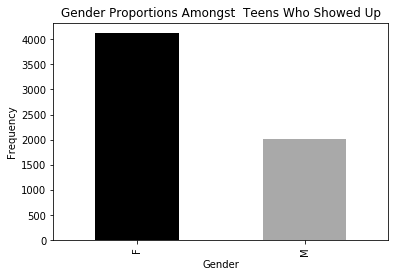

In [76]:
# creating a chart to see if gender is a variable to consider in this category
gendershow(df_teens_show,category='Teens')

seems Gender will be an important  variable to be considered in predicting no_show in the Teens Category 

In [77]:
# calling describe method on the days_apart variable 
df_teens_show['days_apart'].describe()

count    6141.000000
mean        7.313630
std        11.870816
min         0.000000
25%         0.000000
50%         1.000000
75%        10.000000
max        90.000000
Name: days_apart, dtype: float64

In [78]:
# calling describe method on the days_apart variable for the male gender 
df_teens_show['days_apart'][df_teens_show['gender']=='M'].describe()

count    2021.000000
mean        6.644236
std        11.792035
min         0.000000
25%         0.000000
50%         0.000000
75%         7.000000
max        69.000000
Name: days_apart, dtype: float64

Text(0,0.5,'Days Difference')

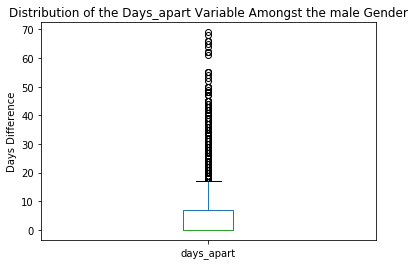

In [79]:
df_teens_show['days_apart'][df_teens_show['gender']=='M'].plot(kind='box',title='Distribution of the Days_apart Variable Amongst the male Gender');
plt.ylabel('Days Difference')

In [80]:
df_teens_show['days_apart'][df_teens_show['gender']=='F'].describe()

count    4120.000000
mean        7.641990
std        11.896933
min         0.000000
25%         0.000000
50%         1.000000
75%        11.000000
max        90.000000
Name: days_apart, dtype: float64

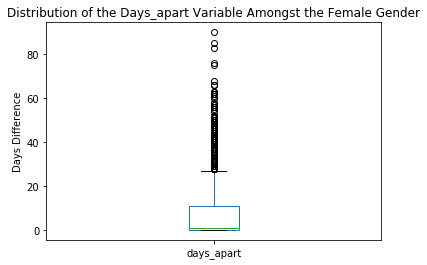

In [81]:
df_teens_show['days_apart'][df_teens_show['gender']=='F'].plot(kind='box',title='Distribution of the Days_apart Variable Amongst the Female Gender')
plt.ylabel('Days Difference');

In [82]:
## Dataset of Teens Category with No Turn out
df_teens_noshow=df_teens.query('no_show=="Yes"')

In [83]:
df_variables=df_teens_noshow[['gender','scholarship','appointment_day','sms','diabetes','handicap']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
F    1372
M     758
Name: gender, dtype: int64

scholarship
0    1804
1     326
Name: scholarship, dtype: int64

appointment_day
Tuesday      510
Wednesday    487
Friday       444
Monday       364
Thursday     324
Saturday       1
Name: appointment_day, dtype: int64

sms
0    1265
1     865
Name: sms, dtype: int64

diabetes
0    2119
1      11
Name: diabetes, dtype: int64

handicap
0    2104
1      24
3       1
2       1
Name: handicap, dtype: int64



In [84]:
df_teens_noshow['days_apart'][df_teens_noshow['gender']=='F'].describe()

count    1372.000000
mean       14.776968
std        13.736866
min         0.000000
25%         4.000000
50%        11.000000
75%        22.000000
max        84.000000
Name: days_apart, dtype: float64

In [85]:
df_teens_noshow['days_apart'][df_teens_noshow['gender']=='M'].describe()

count    758.000000
mean      12.269129
std       14.464967
min        0.000000
25%        0.000000
50%        7.000000
75%       21.000000
max      126.000000
Name: days_apart, dtype: float64

Appointment in the Teens Category will be defaulted if they  tend to occur within a 14 days_apart value and more 

Next is the **Adult** Category

In [86]:
# Adult group 
df_adult=df.query('age_groups=="Adult"')
print('Number of Observations that falls within The Adult  Category-', df_adult.shape[0])
df_adult.head()

Number of Observations that falls within The Adult  Category- 30270


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart,age_groups
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday,2,Adult
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday,2,Adult
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday,Friday,0,Adult
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,Wednesday,Friday,2,Adult
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,Tuesday,Friday,3,Adult


The Adult Category constitutes 30% of the dataset

F    21819
M     8451
Name: gender, dtype: int64


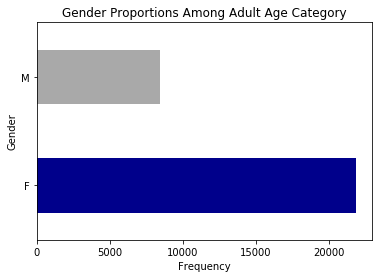

In [87]:
# gender viz of the Adult category
genderviz(df_adult,col='gender',category='Adult')

The female gender constitutes at least 2X of the male gender in the Adult Category , this is worth taking note of and it will be explored.<br>Checking for the variables that make up the  Adult Category 

No     23291
Yes     6979
Name: no_show, dtype: int64


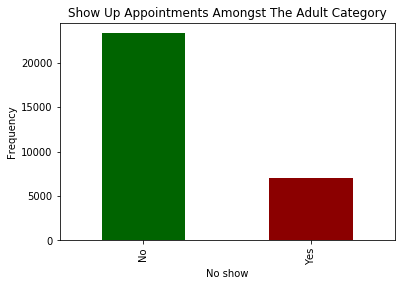

In [88]:
# #no show Variable
showviz(df_adult,category='Adult')

Approximately 7000 patients defaulted on their appointments,and thats 23% of the Adult age Category .

In [89]:
## Dataset of Adult Category with Turn out
df_adult_show=df_adult.query('no_show=="No"')
df_variables=df_adult_show[['gender','scholarship','appointment_day','sms','diabetes','alcoholism','handicap']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
F    16762
M     6529
Name: gender, dtype: int64

scholarship
0    20057
1     3234
Name: scholarship, dtype: int64

appointment_day
Wednesday    5572
Tuesday      5491
Monday       4618
Friday       3907
Thursday     3696
Saturday        7
Name: appointment_day, dtype: int64

sms
0    16397
1     6894
Name: sms, dtype: int64

diabetes
0    22892
1      399
Name: diabetes, dtype: int64

alcoholism
0    22757
1      534
Name: alcoholism, dtype: int64

handicap
0    22907
1      352
2       32
Name: handicap, dtype: int64



More Than 5000 appointments were defaulted in the female Adult Category ,while 1900 appointments were defaulted by their Male counterparts ,variables such as diabetes, sms , hypertension, alcoholism, and scholarship have a No value(i.e majority of the observations are not alcholic nor receive sms nor diabetic.

In [90]:
# calling describe method on the days_apart variable 
df_adult_show['days_apart'].describe()

count    23291.000000
mean         8.181401
std         13.032029
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        176.000000
Name: days_apart, dtype: float64

In [91]:
# calling describe method on the days_apart variable for the male gender 
df_adult_show['days_apart'][df_adult_show['gender']=='M'].describe()

count    6529.000000
mean        7.147496
std        12.697647
min         0.000000
25%         0.000000
50%         1.000000
75%         8.000000
max       127.000000
Name: days_apart, dtype: float64

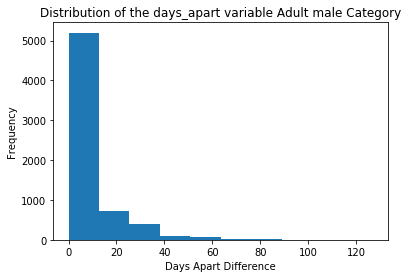

In [92]:
df_adult_show['days_apart'][df_adult_show['gender']=='M'].plot(kind='hist',title='Distribution of the days_apart variable Adult male Category')
plt.xlabel('Days Apart Difference');

In [93]:
# calling describe method on the days_apart variable for the female gender 
df_adult_show['days_apart'][df_adult_show['gender']=='F'].describe()

count    16762.000000
mean         8.584119
std         13.138348
min          0.000000
25%          0.000000
50%          2.000000
75%         13.000000
max        176.000000
Name: days_apart, dtype: float64

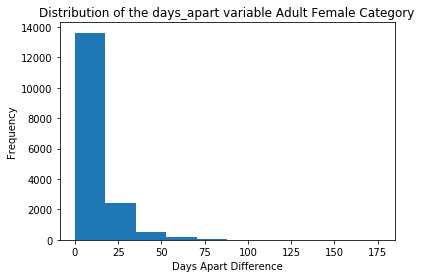

In [94]:
df_adult_show['days_apart'][df_adult_show['gender']=='F'].plot(kind='hist',title='Distribution of the days_apart variable Adult Female Category')
plt.xlabel('Days Apart Difference');

In [95]:
## Dataset of Adult Category with No Turn out
df_adult_noshow=df_adult.query('no_show=="Yes"')
df_variables=df_adult_noshow[['gender','scholarship','appointment_day','sms','diabetes','alcoholism','handicap']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
F    5057
M    1922
Name: gender, dtype: int64

scholarship
0    5898
1    1081
Name: scholarship, dtype: int64

appointment_day
Tuesday      1641
Wednesday    1582
Monday       1467
Friday       1280
Thursday     1007
Saturday        2
Name: appointment_day, dtype: int64

sms
0    3587
1    3392
Name: sms, dtype: int64

diabetes
0    6866
1     113
Name: diabetes, dtype: int64

alcoholism
0    6779
1     200
Name: alcoholism, dtype: int64

handicap
0    6901
1      72
2       6
Name: handicap, dtype: int64



In [96]:
df_adult_noshow['days_apart'].describe()

count    6979.000000
mean       15.966614
std        15.234224
min         0.000000
25%         5.000000
50%        12.000000
75%        23.000000
max       179.000000
Name: days_apart, dtype: float64

days apart variable and gender will make a really good factor in predicting no show among Adult patients .  

In [97]:
df['age_groups'].value_counts()

Adult           30270
Senior Adult    30081
Elderly         19761
Child           10407
Teens            8271
Toddler          4301
Infant           3891
Name: age_groups, dtype: int64

In [98]:
# Senior Adult group 
df_snr_adult=df.query('age_groups=="Senior Adult"')
print('Number of Observations that falls within The Senior Adult  Category-', df_snr_adult.shape[0])
df_snr_adult.head()

Number of Observations that falls within The Senior Adult  Category- 30081


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart,age_groups
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0,Senior Adult
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0,Senior Adult
14,9.988472e+13,5633951,F,2016-04-28,2016-04-29,54,NOVA PALESTINA,0,0,0,0,0,0,No,Thursday,Friday,1,Senior Adult
16,8.457439e+13,5633121,M,2016-04-28,2016-04-29,50,NOVA PALESTINA,0,0,0,0,0,0,No,Thursday,Friday,1,Senior Adult
19,7.223289e+12,5640433,F,2016-04-29,2016-04-29,46,DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0,Senior Adult


The senior Adult category approximately constitutes about 30% of the entire dataset.

F    20668
M     9413
Name: gender, dtype: int64


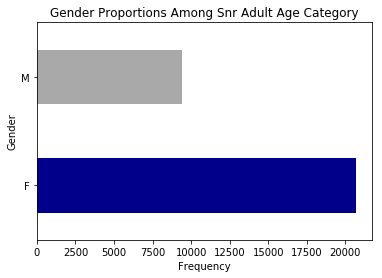

In [99]:
## Gender visualization of The Snr Adult Category
genderviz(df_snr_adult,col='gender',category='Snr Adult')

The female number of observations is at least 2X of of their male counterparts , and this have been happening from the teens Category .

No     24490
Yes     5591
Name: no_show, dtype: int64


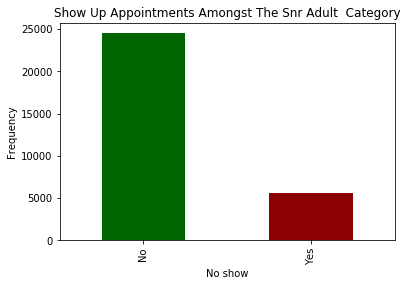

In [100]:
#no show Variable
showviz(df_snr_adult,category='Snr Adult ')

5,000 observations were default appointments ,out of the total 30,000 Observations 

In [101]:
## Dataset of Senior Adult Category with Turn out
df_snr_adult_show=df_snr_adult.query('no_show=="No"')
df_variables=df_snr_adult_show[['gender','scholarship','appointment_day','sms','diabetes','alcoholism','handicap']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
F    16798
M     7692
Name: gender, dtype: int64

scholarship
0    22462
1     2028
Name: scholarship, dtype: int64

appointment_day
Wednesday    5800
Tuesday      5681
Monday       4989
Friday       4122
Thursday     3884
Saturday       14
Name: appointment_day, dtype: int64

sms
0    16834
1     7656
Name: sms, dtype: int64

diabetes
0    22073
1     2417
Name: diabetes, dtype: int64

alcoholism
0    22998
1     1492
Name: alcoholism, dtype: int64

handicap
0    23943
1      517
2       28
3        2
Name: handicap, dtype: int64



Over 3500 appointments were defualt courtesy of the female ,while over 1500 default from the senior Adult Male Category.The sms variable evened out, very less patients are on scholarship ,alchol and being handicaped too .<br> **Exploring the days_apart Variable**  

In [102]:
# calling describe method on the days_apart variable 
df_snr_adult_show['days_apart'].describe()

count    24490.000000
mean         9.211556
std         15.092524
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max        179.000000
Name: days_apart, dtype: float64

In [103]:
# calling describe method on the days_apart variable for the female gender 
df_snr_adult_show['days_apart'][df_snr_adult_show['gender']=='F'].describe()


count    16798.000000
mean         9.660436
std         15.422310
min          0.000000
25%          0.000000
50%          3.000000
75%         14.000000
max        179.000000
Name: days_apart, dtype: float64

In [104]:
# calling describe method on the days_apart variable for the male gender 
df_snr_adult_show['days_apart'][df_snr_adult_show['gender']=='M'].describe()

count    7692.000000
mean        8.231279
std        14.298058
min         0.000000
25%         0.000000
50%         2.000000
75%         9.000000
max       176.000000
Name: days_apart, dtype: float64

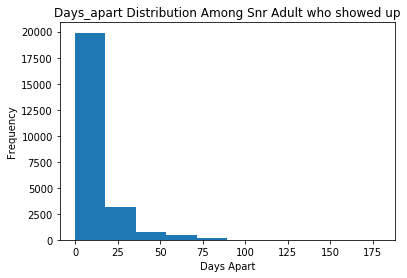

In [105]:
#df_snr_adult_show['days_apart'].plot(kind='hist',title='Distribution of the days_apart variable Senior Adult Category',bins=30);
showdays(df_snr_adult_show,category='Snr Adult')

The days_apart variable is right skewed ,most appointments of the senior Adult Group occur within zero and 5days difference,the days_apart variable will be a factor to be considered in predciting a no show.

In [106]:
## Dataset of Adult Category with No Turn out
df_snr_adult_noshow=df_snr_adult.query('no_show=="Yes"')
df_variables=df_snr_adult_noshow[['gender','scholarship','appointment_day','sms','diabetes','alcoholism','handicap']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
F    3870
M    1721
Name: gender, dtype: int64

scholarship
0    5017
1     574
Name: scholarship, dtype: int64

appointment_day
Tuesday      1310
Monday       1230
Wednesday    1221
Friday        966
Thursday      862
Saturday        2
Name: appointment_day, dtype: int64

sms
0    3150
1    2441
Name: sms, dtype: int64

diabetes
0    5020
1     571
Name: diabetes, dtype: int64

alcoholism
0    5223
1     368
Name: alcoholism, dtype: int64

handicap
0    5476
1     105
2      10
Name: handicap, dtype: int64



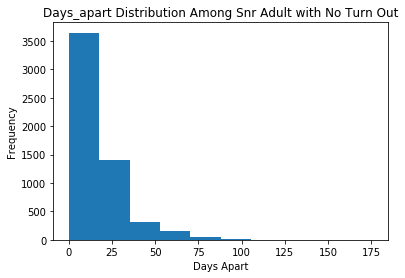

In [107]:
# calling the noshowdays function on the Snr Adult Category with No turn out
noshowdays(df_snr_adult_noshow,category='Snr Adult')

For the senior Adult Category ,gender and days_apart variable will be a good factor to be considered in predicting no show

**Elderly Category**

In [108]:
# Elderly group 
df_elderly=df.query('age_groups=="Elderly"')
print('Number of Observations that falls within The Elderly  Category-', df_elderly.shape[0])
df_elderly.head()

Number of Observations that falls within The Elderly  Category- 19761


,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,scheduled_day,appointment_day,days_apart,age_groups
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0,Elderly
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0,Elderly
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Wednesday,Friday,2,Elderly
24,8.734858e+12,5641780,F,2016-04-29,2016-04-29,65,TABUAZEIRO,0,0,0,0,0,0,No,Friday,Friday,0,Elderly
32,5.288356e+13,5637908,M,2016-04-29,2016-04-29,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No,Friday,Friday,0,Elderly


The elderly Group is responsible for approximately 20% of the Dataset 

F    20668
M     9413
Name: gender, dtype: int64


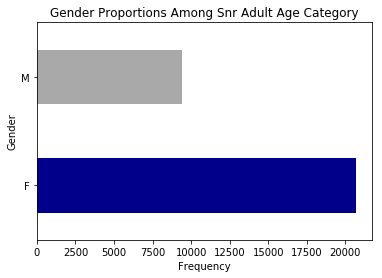

In [109]:
# Gender Viz of the Elderly Age group
genderviz(df_snr_adult,col='gender',category='Snr Adult')

The Female is also at least 2X of their counterparts in this category 

No     16756
Yes     3005
Name: no_show, dtype: int64


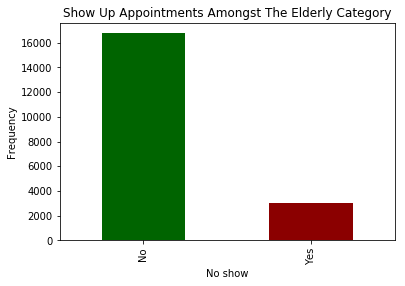

In [110]:
#no show Variable
showviz(df_elderly,category='Elderly')

In [111]:
## Dataset of Elderly Category with Turn out
df_elderly_show=df_elderly.query('no_show=="No"')
df_variables=df_elderly_show[['gender','scholarship','appointment_day','sms','diabetes','alcoholism','handicap']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
F    11198
M     5558
Name: gender, dtype: int64

scholarship
0    16302
1      454
Name: scholarship, dtype: int64

appointment_day
Wednesday    3913
Tuesday      3876
Monday       3442
Friday       2888
Thursday     2628
Saturday        9
Name: appointment_day, dtype: int64

sms
0    11803
1     4953
Name: sms, dtype: int64

diabetes
0    13099
1     3657
Name: diabetes, dtype: int64

alcoholism
0    16117
1      639
Name: alcoholism, dtype: int64

handicap
0    16067
1      636
2       47
3        6
Name: handicap, dtype: int64



The sms variable has disproportionate value, very less patients are on scholarship ,alchol and being handicaped too .<br> **Exploring the days_apart Variable**  

In [112]:
# calling describe method on the days_apart variable 
df_elderly['days_apart'].describe()

count    19761.000000
mean        11.155711
std         18.581231
min          0.000000
25%          0.000000
50%          4.000000
75%         14.000000
max        179.000000
Name: days_apart, dtype: float64

Most appointment in This category occur between zero to 6 days difference

In [113]:
# calling describe method on the days_apart variable for the male gender 
df_elderly_show['days_apart'][df_elderly_show['gender']=='M'].describe()

count    5558.000000
mean        9.807845
std        17.118629
min         0.000000
25%         0.000000
50%         2.000000
75%        12.000000
max       179.000000
Name: days_apart, dtype: float64

In [114]:
# calling describe method on the days_apart variable for the female gender 
df_elderly_show['days_apart'][df_elderly_show['gender']=='F'].describe()


count    11198.000000
mean        10.407394
std         18.202201
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max        179.000000
Name: days_apart, dtype: float64

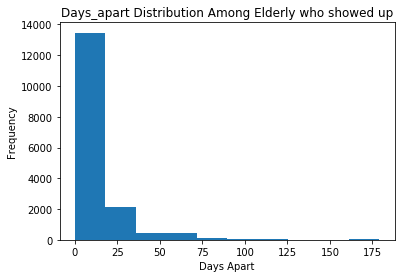

In [115]:
showdays(df_elderly_show,category='Elderly')

In [116]:
## Dataset of Elderly Category with No  Turn out
df_elderly_noshow=df_elderly.query('no_show=="Yes"')
df_variables=df_elderly_noshow[['gender','scholarship','appointment_day','sms','diabetes','alcoholism','handicap']]
for column in df_variables.columns.values.tolist():
        print(column)
        print(df_variables[column].value_counts())
        print("")


gender
F    2075
M     930
Name: gender, dtype: int64

scholarship
0    2921
1      84
Name: scholarship, dtype: int64

appointment_day
Tuesday      721
Wednesday    669
Monday       620
Friday       532
Thursday     459
Saturday       4
Name: appointment_day, dtype: int64

sms
0    1826
1    1179
Name: sms, dtype: int64

diabetes
0    2275
1     730
Name: diabetes, dtype: int64

alcoholism
0    2909
1      96
Name: alcoholism, dtype: int64

handicap
0    2870
1     117
2      17
3       1
Name: handicap, dtype: int64



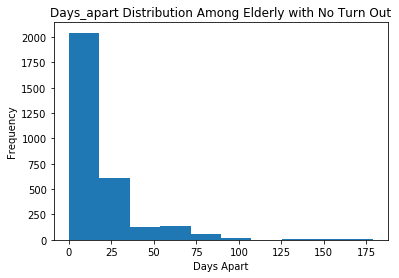

In [117]:
noshowdays(df_elderly_noshow,category='Elderly')

<a id='conclusions'></a>
## Conclusions
**Insights:** <br>
**Infant,Toddler,Child:** <br>
For these three categories;
* there's no disproportion among the genders 
* No appointment were made on saturday 
* Tuesdays and wednesdays have most appointments Turn Out 
* No concrete conclusion or inference could be made from the sms ,handicap,and scholarship variable as they both have similar     proportion   in patients who the default or  show for their appointment
<br> For these three categories ,the factors to consider 

**Teen Category**<br>
* The first gender disproportions were first noticed in this category with the female gender 2X appointment compared to their     male counterparts
* Most Males That comes for scheduling ,do show up for their appointments,they have a higher show up rate compared to their       female counterparts
* wednesdays and Tuesdays are the days with most recorded show ups, No appointments were made on saturday .
* No concrete conclusion or inference could be made from the sms ,handicap,and scholarship variable as they both have similar     proportion   in patients who the default or  show for their appointment
* No scheduling or apppointment were made on saturday

**Adult,Senior Adult and Elderly:**<br>
* The gender disproportions also continues , with the female recording 2X more scheduling compared to their male counterparts .
* Show ups among the Male occur during the first 10 days appointment  ,and their are patients who defaulted in this period too
* No concrete conclusion or inference could be made from the sms ,handicap,,alcoholism, hypertension,diabetes and scholarship     variables as they both have similar   proportion   in patients who the default or  show up  for their appointment.
* No scheduling or apppointment were made on saturday
<br>

In conclusion,From the Analysis and Visualizations, The factors to be considered in predicting a No show Apppointments are
* gender ,
* days_apart,
* appointment_day variables ,
* and the age_groups categories each patient belongs too ,These will all be important  factors in predicting NO-show             appointments of patients :<br>

**Note:** The neighbourhood variable will be an area where additional research could have been done .<br>

**Project Limitation:**<br>
* The Data would have been better analysed if there were variables that indicates the cause of visitations such as basic check   ups ,emergencies etc and a variable that   indicates patient who missed their appointment and then come back for               rescheduling.
* The appointment_date variable was recorded as a date format ,which differs from the datetime formatting of the scheduling       date ,this would have helped if it was recorded as datetime as it might indicate the time patient tend to show up for their     appointments or rather when it is defaulted.





In [118]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0